# Multi Scale Template Matching

###### Please do find the alphabetical Id above every cell 

### A
Downloading the files....
##### a.1 :
Importing the necessary libraries
##### a.2 : 
Copy all the URLs and create a text file

In [ ]:
#a.1
import urllib.request as req
import os
import time

urls = []

with open('cac/b.txt') as fwurls: #a.2
    for line in fwurls:
        urls.append(line.strip())


def create_directory():
    """ Checks if there's an existing directory for Downloaded Files. If not, creates one."""
    global dirName
    dirName = 'Dir name'
    global folder_path
    if os.path.isdir(dirName) == True:
        print("This folder already exists, path:", os.path.abspath(dirName))
    else:
        os.mkdir(dirName)
        global folder_path
        folder_path = os.path.abspath(dirName)
        print("Directory " , dirName ,  " Created ")

create_directory()


def download_file():
    """Goes through the list of URLs and downloades each one in pre-created folder with a specific (URL folder strucute stripped) file name"""
    for lines in urls:
        try:
            req.urlretrieve(lines, '{0}/{1}'.format(folder_path, lines.split('/')[-1]))
            time.sleep(1)
            print ('File - {} - downloaded successfully'.format(lines.split('/')[-1]))
        except urllib.error.HTTPError:
            print('File is missing or not reachable')
    print('Download Complete & Successful!')

download_file()

In [1]:
import numpy as np

In [ ]:
#from PIL import Image
#import os, sys
#path = "D:\\Vicki\hackathons\sample_testset\crops\\"
#dirs = os.listdir( path )

#def resize():
 #   for item in dirs:
  #      if os.path.isfile(path+item):
   #         im = Image.open(path+item)
    #        f, e = os.path.splitext(path+item)
     #       imResize = im.resize((200,200), Image.ANTIALIAS)
      #      imResize.save(f + '.jpg', 'JPEG', quality=100)

#resize()

##### Loading the images : B
###### B.1
* Reading the pixel values of every image for processing. 

In [29]:
import cv2
import os
import glob
cropped_dir = "" # Enter Directory of allcropped images 
normal_dir = ""  # Enter Directory of allcropped images
cropped_data_path = os.path.join(cropped_dir,'*g')
normal_data_path = os.path.join(normal_dir,'*g')
cropped_files = glob.glob(cropped_data_path)
normal_files = glob.glob(normal_data_path)
cropped_data = []
normal_data = []
for f1 in cropped_files:
    image = cv2.imread(f1) #B.1
    cropped_data.append(image)
for f2 in normal_files:
    image = cv2.imread(f2) 
    normal_data.append(image)

In [30]:
len(cropped_data)

6

In [31]:
len(normal_data)

5

#### Reading the file names of all the images in a directory and creating a dictionary

In [32]:
import os

names= os.listdir(cropped_dir)
names

['cropped_image2.jpg',
 'cropped_image3.jpg',
 'cropped_image4.jpg',
 'cropped_image5.jpg',
 'cropped_image6.jpg',
 'cropped_image8.jpg']

In [33]:
crop_dict=dict(zip(names,cropped_data))

#### Dictionary Format
Key 'file_name' : Value 'pixel_values'

In [34]:
crop_dict

{'cropped_image2.jpg': array([[[180, 176, 212],
         [181, 177, 213],
         [181, 177, 213],
         ...,
         [188, 178, 208],
         [188, 178, 208],
         [188, 178, 208]],
 
        [[181, 177, 213],
         [181, 177, 213],
         [181, 177, 213],
         ...,
         [188, 178, 208],
         [188, 178, 208],
         [188, 178, 208]],
 
        [[180, 176, 212],
         [181, 177, 213],
         [181, 177, 213],
         ...,
         [187, 177, 207],
         [187, 177, 207],
         [187, 177, 207]],
 
        ...,
 
        [[112, 129, 180],
         [113, 130, 181],
         [112, 129, 180],
         ...,
         [104,  83,  92],
         [114,  93, 102],
         [119,  98, 107]],
 
        [[110, 129, 180],
         [109, 128, 179],
         [106, 125, 176],
         ...,
         [ 99,  76,  84],
         [113,  90,  98],
         [124, 101, 109]],
 
        [[109, 128, 179],
         [106, 125, 176],
         [103, 122, 173],
         ...,
      

In [35]:
import os

normal_names= os.listdir(normal_dir)
names_dict = dict(zip(normal_names,normal_data))

In [36]:
len(names_dict)

5

##### Template matching using open cv : C

* This is the heart of this notebook. 

###### c.1 :
* Converting the normal image and cropped image from RGB into grayscale image for processing 
    - Gray scale image's pixels have values ranging from 0 to 255 where 0 is black and 255 is white.
    
###### c.2 :

* Using the matchTemplate function from open cv to find the template in large image. It basically slides the template's pixels over the normal image to find the template. 

* Disadvantage :
        - If the cropped image/original image is in different transform like 45 degree rotated then it won't find the template in the image.
       
###### c.3 :

* If the template has an threshold of 0.95 and above, then the x1,y1,x2,y2 values are returned.



In [37]:
def image_values(normal_img,template):
    gray_img = cv2.cvtColor(normal_img, cv2.COLOR_BGR2GRAY) #c.1
    crop_img = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)       
        
    w, h = crop_img.shape[::-1]
    result = cv2.matchTemplate(gray_img, crop_img, cv2.TM_CCOEFF_NORMED) #c.2
    loc = np.where(result >= 0.95) #c.3
    list1=[]
    for pt in zip(*loc[::-1]):
             list1 = [pt[0],pt[1],pt[0]+w,pt[1]+h] #c.4
    return list1 


###### Looping through values in the dictionary
###### format :
{
    'normal_image_key' [
     'crop_image 1_key'
         [
         x1,y1,x2,y2
         ]
     ]
}

In [38]:
array = []
new1 = []
image_values1 = []
count=0
new1= dict()
for normnames,normvalues in names_dict.items():
    new2 = []
    image_v = []
    for cropnames,cropvalues in crop_dict.items():
        image_v = image_values(normvalues,cropvalues)
        if len(image_v)!=0:
            new2.append(cropnames)
            final=[]
            for values in image_v:
                final.append(values)
            new2.append(final)
    if len(new2)!=0:
        new1[normnames]=new2
    else:
        new2.append("#No image associations")
        new1[normnames]=new2
print(new1)

{'full_image1.jpg': ['cropped_image2.jpg', [878, 1408, 1241, 1680], 'cropped_image3.jpg', [1811, 1285, 2219, 1679]], 'full_image2.jpg': ['cropped_image4.jpg', [219, 287, 347, 408], 'cropped_image5.jpg', [328, 52, 454, 154]], 'full_image3.jpg': ['cropped_image6.jpg', [437, 192, 729, 299]], 'full_image4.jpg': ['#No image associations'], 'full_image5.jpg': ['cropped_image8.jpg', [456, 640, 717, 1019]]}


## Values

In [39]:
print(new1)

{'full_image1.jpg': ['cropped_image2.jpg', [878, 1408, 1241, 1680], 'cropped_image3.jpg', [1811, 1285, 2219, 1679]], 'full_image2.jpg': ['cropped_image4.jpg', [219, 287, 347, 408], 'cropped_image5.jpg', [328, 52, 454, 154]], 'full_image3.jpg': ['cropped_image6.jpg', [437, 192, 729, 299]], 'full_image4.jpg': ['#No image associations'], 'full_image5.jpg': ['cropped_image8.jpg', [456, 640, 717, 1019]]}


## Sample


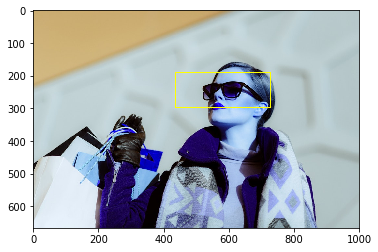

In [41]:
import matplotlib.pyplot as plt
sample_image = cv2.imread("Full image dir")
template = cv2.imread("cropped image dir")
pt = image_values(sample_image,template)
cv2.rectangle(sample_image,(pt[0],pt[1]),(pt[2],pt[3]),(255,255,0),2)
plt.imshow(sample_image)
plt.show()